## 데이터 준비
- 본격적인 분석 전, 데이터를 분석하기 좋은 형태로 정제하는 과정

### 데이터 불러오기

In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import scipy.stats as stats

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
from matplotlib import font_manager
font_list = font_manager.get_font_names()

In [4]:
# plt.rcParams['font.family'] = 'AppleGothic' # 시각화용 폰트 지정
plt.rcParams['font.family'] ='Malgun Gothic'

In [5]:
#colab - 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [6]:
#현재 working directory 변경 후 확인 (colab 사용 시)
# path에 자신에게 맞는 디렉토리 경로 설정
# path = '/content/drive/MyDrive/데이터분석 공부'
# os.chdir(path)
os.chdir('/content/drive/MyDrive/Project/sports')
os.getcwd()

'/content/drive/MyDrive/Project/sports'

In [8]:
voucher = pd.read_csv('KS_SPORTS_VOUCH_FCLTY_INFO_202303.csv') # 스포츠 바우처 시설 데이터
status = pd.read_csv('KS_WNTY_PHSTRN_FCLTY_STTUS_202303.csv', low_memory= False) # 전체 체육시설 데이터
using = pd.read_csv('KS_AREA_ACCTO_SPORTS_VOUCH_PRCUSE_INFO_202303.csv') # 스포츠 바우처 이용 현황 데이터

voucher.head()

,CTPRVN_CD,CTPRVN_NM,SIGNGU_CD,SIGNGU_NM,FCLTY_NM,RPRSNTV_NM,RPRSNTV_TEL_NO,ZIP_NO,FCLTY_ADDR,DETAIL_ADDR,ITEM_CD,ITEM_NM,FCLTY_X_CRDNT_VALUE,FCLTY_Y_CRDNT_VALUE,FCLTY_COURSE_SDIV_NM,COURSE_ITEM_NM,COURSE_NM,FCLTY_DECSN_DE
0,11,서울,11440,마포구,성산경원태권도,조**,NaN,121877,서울 마포구 중동 1~99,64-25현대상가4층9호,22.0,태권도,NaN,NaN,NaN,NaN,NaN,20130618.0
1,11,서울,11260,중랑구,우디안태권도,이**,NaN,2055,서울특별시 중랑구 신내역로3길 4,"(신내동) 502, 503, 504호(신내동, 신내골드프라자)",22.0,태권도,NaN,NaN,NaN,NaN,NaN,20180118.0
2,11,서울,11230,동대문구,크로스핏 핏불,이**,NaN,2566,서울특별시 동대문구 왕산로 122,지하2층(용두동),25.0,헬스,NaN,NaN,NaN,NaN,NaN,20230126.0
3,11,서울,11470,양천구,신은태우태권도,김**,NaN,8049,서울특별시 양천구 신정이펜2로 20,"(신정동) 701호, 702호",22.0,태권도,NaN,NaN,NaN,NaN,NaN,20230227.0
4,11,서울,11470,양천구,신월익스트림태권도,유**,NaN,7910,서울특별시 양천구 가로공원로 106,2층 신월익스트림태권도(신월동),22.0,태권도,NaN,NaN,NaN,NaN,NaN,20190315.0


In [9]:
vou = voucher.copy()
stat = status.copy()
use = using.copy()

### 스포츠 바우처 시설 데이터 정제
- 시도명 변경
- 시설 결정 일자 2023년 이후인 곳 제외

In [10]:
vou.columns

Index(['CTPRVN_CD', 'CTPRVN_NM', 'SIGNGU_CD', 'SIGNGU_NM', 'FCLTY_NM',
       'RPRSNTV_NM', 'RPRSNTV_TEL_NO', 'ZIP_NO', 'FCLTY_ADDR', 'DETAIL_ADDR',
       'ITEM_CD', 'ITEM_NM', 'FCLTY_X_CRDNT_VALUE', 'FCLTY_Y_CRDNT_VALUE',
       'FCLTY_COURSE_SDIV_NM', 'COURSE_ITEM_NM', 'COURSE_NM',
       'FCLTY_DECSN_DE'],
      dtype='object')

#### 시도명 변경
- 다른 데이터와의 통일성을 위해 시도명 변경 진행

In [11]:
city = {'경기':'경기도', '서울':'서울특별시', '인천':'인천광역시',
        '경북':'경상북도', '경남':'경상남도', '부산':'부산광역시', '대구':'대구광역시', '울산':'울산광역시',
        '강원':'강원도',
        '전북':'전라북도', '전남':'전라남도', '광주':'광주광역시',
        '충북':'충청북도', '충남':'충청남도', '세종':'세종특별자치시', '대전':'대전광역시',
        '제주': '제주특별자치도'
        }

In [12]:
vou['CTPRVN_NM'].replace(city, inplace=True)
vou.CTPRVN_NM.value_counts()

경기도        3963
서울특별시      2117
경상남도       1285
부산광역시      1089
인천광역시       955
경상북도        881
대구광역시       866
광주광역시       737
전라북도        724
충청남도        630
전라남도        585
강원도         573
충청북도        531
대전광역시       497
울산광역시       372
제주특별자치도     245
세종특별자치시     141
Name: CTPRVN_NM, dtype: int64

In [13]:
vou.head()

,CTPRVN_CD,CTPRVN_NM,SIGNGU_CD,SIGNGU_NM,FCLTY_NM,RPRSNTV_NM,RPRSNTV_TEL_NO,ZIP_NO,FCLTY_ADDR,DETAIL_ADDR,ITEM_CD,ITEM_NM,FCLTY_X_CRDNT_VALUE,FCLTY_Y_CRDNT_VALUE,FCLTY_COURSE_SDIV_NM,COURSE_ITEM_NM,COURSE_NM,FCLTY_DECSN_DE
0,11,서울특별시,11440,마포구,성산경원태권도,조**,NaN,121877,서울 마포구 중동 1~99,64-25현대상가4층9호,22.0,태권도,NaN,NaN,NaN,NaN,NaN,20130618.0
1,11,서울특별시,11260,중랑구,우디안태권도,이**,NaN,2055,서울특별시 중랑구 신내역로3길 4,"(신내동) 502, 503, 504호(신내동, 신내골드프라자)",22.0,태권도,NaN,NaN,NaN,NaN,NaN,20180118.0
2,11,서울특별시,11230,동대문구,크로스핏 핏불,이**,NaN,2566,서울특별시 동대문구 왕산로 122,지하2층(용두동),25.0,헬스,NaN,NaN,NaN,NaN,NaN,20230126.0
3,11,서울특별시,11470,양천구,신은태우태권도,김**,NaN,8049,서울특별시 양천구 신정이펜2로 20,"(신정동) 701호, 702호",22.0,태권도,NaN,NaN,NaN,NaN,NaN,20230227.0
4,11,서울특별시,11470,양천구,신월익스트림태권도,유**,NaN,7910,서울특별시 양천구 가로공원로 106,2층 신월익스트림태권도(신월동),22.0,태권도,NaN,NaN,NaN,NaN,NaN,20190315.0


#### 시설 결정 일자 2023년인 데이터 삭제
- 스포츠 바우처 이용 현황 데이터의 시점이 2022년이기 때문에,
  동일한 조건 하에 분석을 진행하기 위해 2023년에 등록된 시설은 제외함

In [14]:
clean_v = vou.copy()
clean_v = clean_v[clean_v.FCLTY_DECSN_DE < 20230101] #2022년 기준이므로 2023년에 결정된 곳은 제외
clean_v.reset_index(drop=True, inplace=True)
clean_v.head()

,CTPRVN_CD,CTPRVN_NM,SIGNGU_CD,SIGNGU_NM,FCLTY_NM,RPRSNTV_NM,RPRSNTV_TEL_NO,ZIP_NO,FCLTY_ADDR,DETAIL_ADDR,ITEM_CD,ITEM_NM,FCLTY_X_CRDNT_VALUE,FCLTY_Y_CRDNT_VALUE,FCLTY_COURSE_SDIV_NM,COURSE_ITEM_NM,COURSE_NM,FCLTY_DECSN_DE
0,11,서울특별시,11440,마포구,성산경원태권도,조**,NaN,121877,서울 마포구 중동 1~99,64-25현대상가4층9호,22.0,태권도,NaN,NaN,NaN,NaN,NaN,20130618.0
1,11,서울특별시,11260,중랑구,우디안태권도,이**,NaN,2055,서울특별시 중랑구 신내역로3길 4,"(신내동) 502, 503, 504호(신내동, 신내골드프라자)",22.0,태권도,NaN,NaN,NaN,NaN,NaN,20180118.0
2,11,서울특별시,11470,양천구,신월익스트림태권도,유**,NaN,7910,서울특별시 양천구 가로공원로 106,2층 신월익스트림태권도(신월동),22.0,태권도,NaN,NaN,NaN,NaN,NaN,20190315.0
3,11,서울특별시,11740,강동구,크로스핏 지케이,김**,NaN,5306,서울특별시 강동구 양재대로 1609,B1 크로스핏 지케이(천호동),3.0,기타종목,NaN,NaN,NaN,NaN,NaN,20201118.0
4,11,서울특별시,11530,구로구,우리들언어체육발달센터(궁동),장**,NaN,8249,서울특별시 구로구 오리로 1298,4층(궁동),3.0,기타종목,NaN,NaN,NaN,NaN,NaN,20200128.0


In [15]:
clean_v.to_csv('voucher.csv',index=False) # csv 파일로 저장하여 후에 그대로 활용

In [16]:
voucher = pd.read_csv('voucher.csv')

In [17]:
voucher.info() # 결측치 및 column 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14891 entries, 0 to 14890
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CTPRVN_CD             14891 non-null  int64  
 1   CTPRVN_NM             14891 non-null  object 
 2   SIGNGU_CD             14891 non-null  int64  
 3   SIGNGU_NM             14891 non-null  object 
 4   FCLTY_NM              14891 non-null  object 
 5   RPRSNTV_NM            14891 non-null  object 
 6   RPRSNTV_TEL_NO        74 non-null     float64
 7   ZIP_NO                14891 non-null  int64  
 8   FCLTY_ADDR            14891 non-null  object 
 9   DETAIL_ADDR           14558 non-null  object 
 10  ITEM_CD               14889 non-null  float64
 11  ITEM_NM               14889 non-null  object 
 12  FCLTY_X_CRDNT_VALUE   0 non-null      float64
 13  FCLTY_Y_CRDNT_VALUE   0 non-null      float64
 14  FCLTY_COURSE_SDIV_NM  104 non-null    object 
 15  COURSE_ITEM_NM     

In [18]:
voucher.columns

Index(['CTPRVN_CD', 'CTPRVN_NM', 'SIGNGU_CD', 'SIGNGU_NM', 'FCLTY_NM',
       'RPRSNTV_NM', 'RPRSNTV_TEL_NO', 'ZIP_NO', 'FCLTY_ADDR', 'DETAIL_ADDR',
       'ITEM_CD', 'ITEM_NM', 'FCLTY_X_CRDNT_VALUE', 'FCLTY_Y_CRDNT_VALUE',
       'FCLTY_COURSE_SDIV_NM', 'COURSE_ITEM_NM', 'COURSE_NM',
       'FCLTY_DECSN_DE'],
      dtype='object')

In [19]:
# 원본데이터를 복제하여 편집용 데이터 생성
voucher2 = voucher.copy()

# 필요없는 column 제거
voucher2.drop(['RPRSNTV_TEL_NO', 'FCLTY_X_CRDNT_VALUE', 'FCLTY_Y_CRDNT_VALUE', 'COURSE_ITEM_NM', 'COURSE_NM', 'CTPRVN_CD', 'SIGNGU_CD'], axis= 1, inplace= True)
voucher2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14891 entries, 0 to 14890
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CTPRVN_NM             14891 non-null  object 
 1   SIGNGU_NM             14891 non-null  object 
 2   FCLTY_NM              14891 non-null  object 
 3   RPRSNTV_NM            14891 non-null  object 
 4   ZIP_NO                14891 non-null  int64  
 5   FCLTY_ADDR            14891 non-null  object 
 6   DETAIL_ADDR           14558 non-null  object 
 7   ITEM_CD               14889 non-null  float64
 8   ITEM_NM               14889 non-null  object 
 9   FCLTY_COURSE_SDIV_NM  104 non-null    object 
 10  FCLTY_DECSN_DE        14891 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.2+ MB


In [20]:
# column명 변경
voucher2.columns = ['city', 'district', 'name', 'boss', 'zip', 'address', 'address_detail', 'item_code', 'item', 'course', 'reg_date']

In [21]:
# 결측치 대체
voucher2[voucher2.item.isnull() == True]

,city,district,name,boss,zip,address,address_detail,item_code,item,course,reg_date
158,서울특별시,금천구,정훈태권도장,김**,8532,서울특별시 금천구 가산로 106,"211호(가산동, 주상복합두산아파트)",NaN,NaN,NaN,20180116.0
10667,충청북도,보은군,단국대 본태권도,최**,28947,충청북도 보은군 보은읍 보은로 113,3층 단국대 본태권도,NaN,NaN,NaN,20180618.0


In [22]:
voucher2['item'] = voucher2['item'].fillna('태권도') # 이름을 통해 종목이 태권도임을 확인 -> 결측치 태권도로 대체

In [23]:
voucher2[voucher2.item.isnull() == True] # item column 내 결측치 다 정제되었음을 확인

,city,district,name,boss,zip,address,address_detail,item_code,item,course,reg_date


In [24]:
voucher2.duplicated().sum() # 중복값 확인

0

### 전체 체육 시설 데이터 정제
- 폐업일자가 2022년 이전인 데이터 삭제
- 각 시설에서 제공하는 종목이 사업과 맞는 데이터만 추출

In [25]:
stat.head()

,FCLTY_NM,FCLTY_SDIV_CD,FCLTY_FLAG_NM,INDUTY_CD,INDUTY_NM,FCLTY_TY_CD,FCLTY_TY_NM,FCLTY_STATE_VALUE,ROAD_NM_ZIP_NO,RDNMADR_ONE_NM,...,COMPET_DE,SSS_DE,OPER_CLSBIZ_DE,NATION_ALSFC_AT,ERDSGN_AT,ATNM_CHCK_TRGET_AT,DATA_ORIGIN_FLAG_CD,DEL_AT,REGIST_DT,UPDT_DT
0,(외립석입구),P,공공,P08,간이운동장,P0801,간이운동장,정상운영,NaN,NaN,...,,,,N,,N,NaN,N,2020-02-10,2020-02-10
1,(주)한샘레포츠타운(공단점),N,신고,N10,체력단련장업,N1001,체력단련장,정상운영,15433.0,경기도 안산시 단원구 동산로 63 (원시동),...,,,,N,,Y,NaN,N,2016-12-31,2017-02-26
2,(자산경로당),P,공공,P08,간이운동장,P0801,간이운동장,정상운영,39588.0,경상북도 김천시 자산3길 16 (성내동),...,,,,N,,N,SFMS,N,2020-02-10,2021-04-29
3,안산 힘찬 태권도,N,신고,N08,체육도장업,N0805,태권도,정상운영,15535.0,경기도 안산시 상록구 각골로 127 (본오동),...,,,,N,,Y,SFMS,N,2016-12-31,2019-03-13
4,뽀록 당구장,N,신고,N11,당구장업,N1101,당구장,폐업,461801.0,"경기도 성남시 수정구 산성대로 403 (단대동,2층)",...,,,20220616,N,,Y,NaN,N,2016-11-07,2022-06-17


In [26]:
stat['OPER_CLSBIZ_DE'] = stat['OPER_CLSBIZ_DE'].str.strip()

#### 폐업일자 기준 필터링

In [27]:
# 폐업일자 기준 정제
stat = stat[(stat['OPER_CLSBIZ_DE'] >= '20230101') | (stat['FCLTY_STATE_VALUE'] == '정상운영')] # 2023년에 폐업하여 2022년에는 정상 영업한 곳이거나, 현재에도 정상운영하고 있는 곳
stat

,FCLTY_NM,FCLTY_SDIV_CD,FCLTY_FLAG_NM,INDUTY_CD,INDUTY_NM,FCLTY_TY_CD,FCLTY_TY_NM,FCLTY_STATE_VALUE,ROAD_NM_ZIP_NO,RDNMADR_ONE_NM,...,COMPET_DE,SSS_DE,OPER_CLSBIZ_DE,NATION_ALSFC_AT,ERDSGN_AT,ATNM_CHCK_TRGET_AT,DATA_ORIGIN_FLAG_CD,DEL_AT,REGIST_DT,UPDT_DT
0,(외립석입구),P,공공,P08,간이운동장,P0801,간이운동장,정상운영,NaN,NaN,...,,,,N,,N,NaN,N,2020-02-10,2020-02-10
1,(주)한샘레포츠타운(공단점),N,신고,N10,체력단련장업,N1001,체력단련장,정상운영,15433.0,경기도 안산시 단원구 동산로 63 (원시동),...,,,,N,,Y,NaN,N,2016-12-31,2017-02-26
2,(자산경로당),P,공공,P08,간이운동장,P0801,간이운동장,정상운영,39588.0,경상북도 김천시 자산3길 16 (성내동),...,,,,N,,N,SFMS,N,2020-02-10,2021-04-29
3,안산 힘찬 태권도,N,신고,N08,체육도장업,N0805,태권도,정상운영,15535.0,경기도 안산시 상록구 각골로 127 (본오동),...,,,,N,,Y,SFMS,N,2016-12-31,2019-03-13
5,사동 용인대 올림픽 태권도장,N,신고,N08,체육도장업,N0805,태권도,정상운영,15500.0,"경기도 안산시 상록구 중보로 22 (사동, 늘푸른아파트)",...,,,,N,,Y,SFMS,N,2016-12-31,2022-11-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122376,美 Diet Boxing Club,N,신고,N08,체육도장업,N0801,권투,정상운영,7262.0,서울특별시 영등포구 영등포로 85-1 (양평동1가),...,,,,N,,Y,태블릿,N,2016-12-30,2019-01-03
122377,우리 아이풀(舊 크레피아수영장),N,신고,N07,수영장업,N0701,실내,정상운영,302800.0,대전광역시 서구 계백로 1186 (가수원동),...,,,,N,N,N,NaN,N,2016-12-31,2018-09-19
122378,태권道장 휘영찬,N,신고,N08,체육도장업,N0805,태권도,정상운영,302812.0,"대전광역시 서구 관저동로 66 (관저동, 3층)",...,,,,N,,Y,NaN,N,2016-12-31,2018-09-20
122379,道心성인태권도,N,신고,N08,체육도장업,N0805,태권도,정상운영,1384.0,서울특별시 도봉구 방학로 175(방학동),...,,,,N,,Y,SFMS,N,2021-09-01,2021-09-01


In [28]:
stat['FCLTY_TY_NM'].unique()

array(['간이운동장', '체력단련장', '태권도', '당구장', '유도', '검도', '실내', '무도학원', '우슈',
       '권투', '실외', '골프', '스크린', '카누장', '축구', '야구장', '종합체육시설', '썰매장',
       '빙상장', '야구', '복합', '승마장', '합기도', '요트장', '인공암벽장', '줄넘기', '수영', '농구',
       '롤러스케이트', '생활체육관', '골프장', '골프연습장', '구기체육관', '수영장', '기타시설', '축구장',
       '무도장', '육상경기장', '레슬링', '배드민턴', '국궁장', '전천후게이트볼장', '씨름장', '빙상',
       '테니스장', '기타체육시설(체력단련장)', '하키장', '롤러스케이트장', '투기체육관', nan, '사격장',
       '스키장', '양궁장', '스키점프', '바이애슬론', '크로스컨트리', '조정카누장', '사이클경기장',
       '자동차경주장'], dtype=object)

#### 사업 제공 종목에 해당하는 데이터만 필터링

```
'태권도', '헬스', '기타종목', '복싱', '펜싱', '필라테스', '배드민턴', '합기도', '검도', '유도',
       '발레', '댄스', '농구', '요가', '축구', '테니스', '수영', '탁구', '야구', '에어로빅',
       '롤러인라인', '골프', '빙상', '볼링', '스쿼시', '승마', '배구'
```



In [29]:
youth_fac = ['야구장', '생활체육관','수영장', '기타시설', '축구장','구기체육관','육상경기장', '테니스장','기타체육시설(체력단련장)',
             '승마장','롤러스케이트장','투기체육관','인공암벽장', '체력단련장', '유도', '검도', '빙상장', '야구', '합기도',
             '줄넘기', '수영', '농구', '배드민턴', '무도학원', '롤러스케이트', '스키장', '종합체육시설', '구기체육관', '양궁장',
             '국궁장', '골프장', '골프연습장', '레슬링', '하키장', '조정카누장', '무도학원']

In [30]:
clean_s = stat[stat['FCLTY_TY_NM'].isin(youth_fac)]
clean_s.reset_index(drop=True)
clean_s.head()

,FCLTY_NM,FCLTY_SDIV_CD,FCLTY_FLAG_NM,INDUTY_CD,INDUTY_NM,FCLTY_TY_CD,FCLTY_TY_NM,FCLTY_STATE_VALUE,ROAD_NM_ZIP_NO,RDNMADR_ONE_NM,...,COMPET_DE,SSS_DE,OPER_CLSBIZ_DE,NATION_ALSFC_AT,ERDSGN_AT,ATNM_CHCK_TRGET_AT,DATA_ORIGIN_FLAG_CD,DEL_AT,REGIST_DT,UPDT_DT
1,(주)한샘레포츠타운(공단점),N,신고,N10,체력단련장업,N1001,체력단련장,정상운영,15433.0,경기도 안산시 단원구 동산로 63 (원시동),...,,,,N,,Y,NaN,N,2016-12-31,2017-02-26
28,스포밸리,N,신고,N10,체력단련장업,N1001,체력단련장,정상운영,425906.0,"경기도 안산시 단원구 광덕대로 168 (고잔동,신화타운6층)",...,,,,N,,Y,NaN,N,2016-12-31,2020-09-29
37,휘트니스 존,N,신고,N10,체력단련장업,N1001,체력단련장,정상운영,13327.0,"경기도 성남시 수정구 수정로 140, 세민빌딩 4,5층 (수진동)",...,,,,N,,Y,SFMS,N,2016-11-07,2022-03-16
55,김포유도관,N,신고,N08,체육도장업,N0803,유도,정상운영,10110.0,경기도 김포시 돌문로15번길 20 (사우동),...,,,,N,,Y,태블릿,N,2016-12-31,2020-07-27
77,성포검도관,N,신고,N08,체육도장업,N0804,검도,정상운영,15288.0,경기도 안산시 상록구 예술광장로 1 (월피동),...,,,,N,,Y,SFMS,N,2016-12-31,2020-09-24


In [31]:
clean_s.reset_index(drop=True, inplace=True)
# 종목 필터링 진행한 데이터, 이전 데이터 row 수 비교
print('종목 필터링 전:',stat.shape, '종목 필터링 후:', clean_s.shape)

종목 필터링 전: (98976, 58) 종목 필터링 후: (26091, 58)


In [32]:
clean_s.head()

,FCLTY_NM,FCLTY_SDIV_CD,FCLTY_FLAG_NM,INDUTY_CD,INDUTY_NM,FCLTY_TY_CD,FCLTY_TY_NM,FCLTY_STATE_VALUE,ROAD_NM_ZIP_NO,RDNMADR_ONE_NM,...,COMPET_DE,SSS_DE,OPER_CLSBIZ_DE,NATION_ALSFC_AT,ERDSGN_AT,ATNM_CHCK_TRGET_AT,DATA_ORIGIN_FLAG_CD,DEL_AT,REGIST_DT,UPDT_DT
0,(주)한샘레포츠타운(공단점),N,신고,N10,체력단련장업,N1001,체력단련장,정상운영,15433.0,경기도 안산시 단원구 동산로 63 (원시동),...,,,,N,,Y,NaN,N,2016-12-31,2017-02-26
1,스포밸리,N,신고,N10,체력단련장업,N1001,체력단련장,정상운영,425906.0,"경기도 안산시 단원구 광덕대로 168 (고잔동,신화타운6층)",...,,,,N,,Y,NaN,N,2016-12-31,2020-09-29
2,휘트니스 존,N,신고,N10,체력단련장업,N1001,체력단련장,정상운영,13327.0,"경기도 성남시 수정구 수정로 140, 세민빌딩 4,5층 (수진동)",...,,,,N,,Y,SFMS,N,2016-11-07,2022-03-16
3,김포유도관,N,신고,N08,체육도장업,N0803,유도,정상운영,10110.0,경기도 김포시 돌문로15번길 20 (사우동),...,,,,N,,Y,태블릿,N,2016-12-31,2020-07-27
4,성포검도관,N,신고,N08,체육도장업,N0804,검도,정상운영,15288.0,경기도 안산시 상록구 예술광장로 1 (월피동),...,,,,N,,Y,SFMS,N,2016-12-31,2020-09-24


In [33]:
clean_s.to_csv('facility.csv', index=False) # csv 파일로 저장하여 후에 그대로 활용

In [34]:
# facility.csv 데이터 불러오기
status = pd.read_csv('facility.csv', low_memory = False)

In [35]:
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26091 entries, 0 to 26090
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FCLTY_NM                26091 non-null  object 
 1   FCLTY_SDIV_CD           26091 non-null  object 
 2   FCLTY_FLAG_NM           26091 non-null  object 
 3   INDUTY_CD               26091 non-null  object 
 4   INDUTY_NM               26091 non-null  object 
 5   FCLTY_TY_CD             26091 non-null  object 
 6   FCLTY_TY_NM             26091 non-null  object 
 7   FCLTY_STATE_VALUE       26091 non-null  object 
 8   ROAD_NM_ZIP_NO          22384 non-null  float64
 9   RDNMADR_ONE_NM          24517 non-null  object 
 10  RDNMADR_TWO_NM          7839 non-null   object 
 11  ZIP_NO_VALUE            22551 non-null  float64
 12  FCLTY_ADDR_ONE_NM       21638 non-null  object 
 13  FCLTY_ADDR_TWO_NM       7939 non-null   object 
 14  FCLTY_LO                23965 non-null

#### 시,군,구를 나타내는 `district`, 시,도를 나타내는 `city` 내 결측치 대체
- 지역을 기준으로 분석을 진행할 것이기 때문에, 해당 column의 결측치 대체 필요

In [36]:
status.columns[status.columns.str.contains('CTPRVN_NM')]

Index(['CTPRVN_NM', 'FCLTY_MANAGE_CTPRVN_NM', 'POSESN_MBY_CTPRVN_NM'], dtype='object')

In [37]:
#시도 이름이 결측치인 값 확인
sigun_cols = ['FCLTY_NM',  'CTPRVN_NM', 'FCLTY_ADDR_ONE_NM','FCLTY_MANAGE_CTPRVN_NM', 'POSESN_MBY_CTPRVN_NM']
status[status['CTPRVN_NM'].isna()==True][sigun_cols]

,FCLTY_NM,CTPRVN_NM,FCLTY_ADDR_ONE_NM,FCLTY_MANAGE_CTPRVN_NM,POSESN_MBY_CTPRVN_NM
2997,테스트,NaN,서울특별시 송파구 방이동 88 올림픽공원,서울특별시,NaN
7477,공주병원 운동장,NaN,NaN,충청남도,NaN
7614,안전공단 운동장,NaN,NaN,경기도,NaN
7702,춘천병원 축구장,NaN,NaN,강원도,NaN
8082,안전공단 테니스장,NaN,NaN,경기도,NaN
8411,나주병원 다목적강당,NaN,NaN,전라남도,NaN
8451,부영공원 잔디축구장,NaN,NaN,인천광역시,NaN
8494,연금공단 테니스코트,NaN,NaN,전라북도,NaN
8638,공주병원 다목적체육관,NaN,NaN,충청남도,NaN
8641,나주병원 다목적운동장,NaN,NaN,전라남도,NaN


In [38]:
#FCLTY_MANAGE_CTPRVN_NM로 대체
con1 = status['CTPRVN_NM'].isna()==True
status.loc[con1, 'CTPRVN_NM']=status.loc[con1, 'FCLTY_MANAGE_CTPRVN_NM']

In [39]:
# 결측치 확인
status.CTPRVN_NM.isna().sum()

0

In [40]:
# 시군구 이름이 결측치인 값 확인
sigun_cols = ['FCLTY_NM', 'SIGNGU_NM','FCLTY_ADDR_ONE_NM', 'FCLTY_MANAGE_SIGNGU_NM', 'POSESN_MBY_SIGNGU_NM']
status[status['SIGNGU_NM'].isna()==True][sigun_cols]

,FCLTY_NM,SIGNGU_NM,FCLTY_ADDR_ONE_NM,FCLTY_MANAGE_SIGNGU_NM,POSESN_MBY_SIGNGU_NM
407,더 스타휴 컨트리 클럽,NaN,경기 양평군 양동면 양동로 756,양평군,양평군
612,동촌,NaN,충북 충주시 노은면 감노로 1327,충주시,충주시
654,세일,NaN,충북 충주시 신니면 동락길 207,충주시,충주시
1061,범어 궁도장,NaN,대구광역시 수성구 범어동 681-4,수성구,NaN
1437,라싸 골프클럽,NaN,경기도 포천시 이동면 연곡리 산142-1,포천시,NaN
...,...,...,...,...,...
25563,Snow park,NaN,강원 원주시 지정면 오크밸리1길 66,원주시,원주시
25675,test,NaN,NaN,양평군,NaN
25788,양평T.P.C 골프장,NaN,경기 양평군 지평면 대평평장길 113-8,양평군,양평군
25789,양평TPC GC,NaN,NaN,양평군,NaN


In [41]:
# 1. FCLTY_MANAGE_SIGNGU_NM으로 대체
rplc=status.loc[status['SIGNGU_NM'].isna()==True, 'FCLTY_MANAGE_SIGNGU_NM'].str.split(" ",expand=True)[0].values
status.loc[status['SIGNGU_NM'].isna()==True, 'SIGNGU_NM']=rplc



In [42]:
# 2. POSESN_MBY_SIGNGU_NM으로 대체
rplc2 = status.loc[status['SIGNGU_NM'].isna()==True, 'POSESN_MBY_SIGNGU_NM']
status.loc[status['SIGNGU_NM'].isna()==True, 'SIGNGU_NM']=rplc2

In [43]:
# 1,2번 이후 결측치 확인
status[status['SIGNGU_NM'].isna()==True][sigun_cols]

# 수작업
last_ls = ['세종특별자치시','충주시','부평구', '부평구', '동구', '계양구', '남동구', '광진구', '광진구', '서구', '광진구','연수구','연수구']
status.loc[status['SIGNGU_NM'].isna(), 'SIGNGU_NM']=last_ls

In [44]:
status[status['SIGNGU_NM'].isna()][sigun_cols]

,FCLTY_NM,SIGNGU_NM,FCLTY_ADDR_ONE_NM,FCLTY_MANAGE_SIGNGU_NM,POSESN_MBY_SIGNGU_NM


In [45]:
status2 = status.copy()
# 필요한 column만 선택
status2 = status2[['FCLTY_NM', 'FCLTY_SDIV_CD', 'INDUTY_NM', 'FCLTY_TY_NM', 'FCLTY_STATE_VALUE', 'CTPRVN_NM', 'SIGNGU_NM', 'FCLTY_MANAGE_CTPRVN_NM', 'FCLTY_MANAGE_SIGNGU_NM', 'OPER_CLSBIZ_DE']]
status2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26091 entries, 0 to 26090
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FCLTY_NM                26091 non-null  object 
 1   FCLTY_SDIV_CD           26091 non-null  object 
 2   INDUTY_NM               26091 non-null  object 
 3   FCLTY_TY_NM             26091 non-null  object 
 4   FCLTY_STATE_VALUE       26091 non-null  object 
 5   CTPRVN_NM               26091 non-null  object 
 6   SIGNGU_NM               26091 non-null  object 
 7   FCLTY_MANAGE_CTPRVN_NM  22192 non-null  object 
 8   FCLTY_MANAGE_SIGNGU_NM  21803 non-null  object 
 9   OPER_CLSBIZ_DE          159 non-null    float64
dtypes: float64(1), object(9)
memory usage: 2.0+ MB


In [46]:
status2.columns

Index(['FCLTY_NM', 'FCLTY_SDIV_CD', 'INDUTY_NM', 'FCLTY_TY_NM',
       'FCLTY_STATE_VALUE', 'CTPRVN_NM', 'SIGNGU_NM', 'FCLTY_MANAGE_CTPRVN_NM',
       'FCLTY_MANAGE_SIGNGU_NM', 'OPER_CLSBIZ_DE'],
      dtype='object')

In [47]:
# column명 변경
status2.columns = ['name', 'code', 'industry', 'type', 'status', 'city', 'district', 'manage_city', 'manage_dist', 'close_date']

In [48]:
# 남구 -> 미추홀구로 변경 (다른 데이터와의 통일성을 위해 변경)
idx = status2[(status2.city == '인천광역시') & (status2.district == '남구')].index.to_list()

for i, c in enumerate(status2['district']):
  if i in idx:
    status2.at[i, 'district'] = '미추홀구'
    status2.at[i, 'manage_dist'] = '미추홀구'
    status2.at[i, 'manage_city'] = '인천광역시'

In [49]:
status2[(status2.city == '인천광역시') & (status2.district == '미추홀구')]

,name,code,industry,type,status,city,district,manage_city,manage_dist,close_date
31,(주)반 휘트니스 지점,N,체력단련장업,체력단련장,정상운영,인천광역시,미추홀구,인천광역시,미추홀구,NaN
296,더 힐 스토리,N,체력단련장업,체력단련장,정상운영,인천광역시,미추홀구,인천광역시,미추홀구,NaN
340,탑 복싱 체육관,N,체육도장업,유도,정상운영,인천광역시,미추홀구,인천광역시,미추홀구,NaN
442,반 휘트니스,N,체력단련장업,체력단련장,정상운영,인천광역시,미추홀구,인천광역시,미추홀구,NaN
450,선 헬스센터,N,체력단련장업,체력단련장,정상운영,인천광역시,미추홀구,인천광역시,미추홀구,NaN
...,...,...,...,...,...,...,...,...,...,...
23585,GOOd LIFE FITNESS,N,체력단련장업,체력단련장,정상운영,인천광역시,미추홀구,인천광역시,미추홀구,NaN
25290,제이투짐 PT Shop,N,체력단련장업,체력단련장,정상운영,인천광역시,미추홀구,인천광역시,미추홀구,NaN
25711,THE GYM,N,체력단련장업,체력단련장,정상운영,인천광역시,미추홀구,인천광역시,미추홀구,NaN
25713,THE GYM,N,체력단련장업,체력단련장,정상운영,인천광역시,미추홀구,인천광역시,미추홀구,NaN


In [50]:
status2.loc[status2['city']=='세종특별자치시','district']='세종특별자치시'

#### 중복값 제거

In [51]:
status2[status2.duplicated()]

,name,code,industry,type,status,city,district,manage_city,manage_dist,close_date
54,(주)파크짐,N,체력단련장업,체력단련장,정상운영,서울특별시,중구,NaN,NaN,NaN
132,(주)제이브로짐,N,체력단련장업,체력단련장,정상운영,서울특별시,강남구,NaN,NaN,NaN
183,(주)크로스핏엑스,N,체력단련장업,체력단련장,정상운영,서울특별시,마포구,서울특별시,마포구,NaN
275,땀,N,체력단련장업,체력단련장,정상운영,경상남도,진주시,경상남도,진주시,NaN
280,와~스타디움,P,육상경기장,육상경기장,정상운영,경기도,안산시,경기도,안산시,NaN
...,...,...,...,...,...,...,...,...,...,...
25765,하늘TMA합기도,N,체육도장업,합기도,정상운영,충청남도,태안군,충청남도,태안군,NaN
25772,Top유황스파 휘트니스,N,체력단련장업,체력단련장,정상운영,경상남도,진주시,경상남도,진주시,NaN
25835,Up-Dream 헬스장,N,체력단련장업,체력단련장,정상운영,부산광역시,서구,부산광역시,서구,NaN
25899,W휘트니스,N,체력단련장업,체력단련장,정상운영,충청남도,논산시,충청남도,논산시,NaN


In [52]:
status2[status2.name == '(주)파크짐'] # 중복 예시

,name,code,industry,type,status,city,district,manage_city,manage_dist,close_date
52,(주)파크짐,N,체력단련장업,체력단련장,정상운영,서울특별시,중구,서울특별시,중구,NaN
53,(주)파크짐,N,체력단련장업,체력단련장,정상운영,서울특별시,중구,NaN,NaN,NaN
54,(주)파크짐,N,체력단련장업,체력단련장,정상운영,서울특별시,중구,NaN,NaN,NaN
55,(주)파크짐,N,체력단련장업,체력단련장,폐업,서울특별시,중구,서울특별시,중구,20230206.0


In [53]:
status2.duplicated().sum()
status2.drop_duplicates(inplace=True)
status2.reset_index(inplace=True, drop=True) # 중복 제거 및 인덱스 재정렬

### 스포츠 바우처 이용현황 데이터 정제
- column 이름 변경

In [54]:
use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   BASE_YEAR                    458 non-null    int64 
 1   CTPRVN_CD                    458 non-null    int64 
 2   CTPRVN_NM                    458 non-null    object
 3   SIGNGU_CD                    458 non-null    int64 
 4   SIGNGU_NM                    458 non-null    object
 5   SIGNGU_ACCTO_POPLTN_CO       458 non-null    int64 
 6   SIGNGU_ACCTO_FCLTY_CO        458 non-null    int64 
 7   RECIPT_FLAG_CD               458 non-null    object
 8   RECIPT_FLAG_NM               458 non-null    object
 9   CRRSPND_FLAG_TRGET_NMPR_CO   458 non-null    int64 
 10  CRRSPND_FLAG_RECIPT_NMPR_CO  458 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 39.5+ KB


In [55]:
use.columns

Index(['BASE_YEAR', 'CTPRVN_CD', 'CTPRVN_NM', 'SIGNGU_CD', 'SIGNGU_NM',
       'SIGNGU_ACCTO_POPLTN_CO', 'SIGNGU_ACCTO_FCLTY_CO', 'RECIPT_FLAG_CD',
       'RECIPT_FLAG_NM', 'CRRSPND_FLAG_TRGET_NMPR_CO',
       'CRRSPND_FLAG_RECIPT_NMPR_CO'],
      dtype='object')

In [56]:
use2 = use.copy()
use2.drop(['CTPRVN_CD', 'SIGNGU_CD', 'RECIPT_FLAG_CD'], axis= 1, inplace= True)

In [57]:
use2.columns

Index(['BASE_YEAR', 'CTPRVN_NM', 'SIGNGU_NM', 'SIGNGU_ACCTO_POPLTN_CO',
       'SIGNGU_ACCTO_FCLTY_CO', 'RECIPT_FLAG_NM', 'CRRSPND_FLAG_TRGET_NMPR_CO',
       'CRRSPND_FLAG_RECIPT_NMPR_CO'],
      dtype='object')

In [58]:
use2.columns = ['year', 'city', 'district', 'population', 'facil_number', 'voucher_name', 'target', 'given']
use2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          458 non-null    int64 
 1   city          458 non-null    object
 2   district      458 non-null    object
 3   population    458 non-null    int64 
 4   facil_number  458 non-null    int64 
 5   voucher_name  458 non-null    object
 6   target        458 non-null    int64 
 7   given         458 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 28.8+ KB


In [59]:
use2.duplicated().sum()

0

### 최종 데이터 저장

In [60]:
# final ver
final_v = voucher2.copy()
final_s = status2.copy()
final_u = use2.copy()

### 분석용 데이터프레임 생성
- 앞서 정제한 3개의 데이터프레임을 통합하여 분석을 위한 데이터프레임 생성

- column 설명
  ``` python
  - city: 시,도
  - district: 시,군,구
  - target: 사업 대상자
  - given: 사업 수혜자
  - recipt_ratio: 수혜 비율
  - fac_total: 체육 시설 total 개수
  - voucher_fac: 스포츠 바우처 참여 시설 개수
  - join_ratio: 시설 참여율
  - kind_num: 제공하는 체육 종목 개수
  - kind: 종목
  - density_ratio: 한 시설 당 수용 가능한 수혜자 수 (수혜자 수 / 스포츠 바우처 참여 시설 개수)
  ```

In [61]:
# 이상한 데이터 발견 후 수정
final_s.loc[(final_s['city']=='경기도')&(final_s['district']=='송파구'),'city']='서울특별시'

In [62]:
# final_u(스포츠 바우처 이용 현황 데이터) 기준으로 생성 시작
ct_pop = final_u.copy()
ct_pop = ct_pop.groupby(['city','district'])[['target', 'given']].sum().reset_index()

# column 생성 (Feature Engineering)
ct_pop['group'] = ct_pop.city.apply(lambda x : 'main' if x == '서울특별시' or x == '경기도' else 'rest') # 서울,경기 지역과 그 외 지역 구분
ct_pop['ratio'] = ct_pop['given'] / ct_pop['target'] # 수혜자 비율
ct_pop['fac_num'] = final_v.groupby(['city', 'district'])['name'].count().values # 참여 시설 수
ct_pop['kind_num'] = final_v.groupby(['city', 'district'])['item'].apply(lambda x: len(x.unique())).values # 참여 가능 종목 수
ct_pop['kind'] = final_v.groupby(['city', 'district'])['item'].unique().values # 참여 가능 종목
ct_pop['fac_ratio'] = ct_pop['given'] / ct_pop['fac_num'] # 한 시설에 수용하는 평균 수혜자 수 (수혜자 수 / 참여 시설 수)
ct_pop['fac_total'] = final_s.groupby(['city', 'district'])['name'].count().values # 전체 시설 수
ct_pop['join_ratio'] = ct_pop['fac_num'] / ct_pop['fac_total'] # 시설 참여율 (참여 시설 수 / 전체 시설 수)

In [63]:
# 순서 정렬
ct_pop = ct_pop[['group','city', 'district', 'target', 'given', 'ratio', 'fac_total', 'fac_num', 'join_ratio', 'kind_num', 'kind', 'fac_ratio']]
ct_pop = ct_pop.rename(columns={'ratio':'recipt_ratio', 'fac_num':'voucher_fac', 'fac_ratio':'density_ratio'}) # 이름 변경 (좀 더 직관적으로 이해할 수 있도록 함)
ct_pop

,group,city,district,target,given,recipt_ratio,fac_total,voucher_fac,join_ratio,kind_num,kind,density_ratio
0,rest,강원도,강릉시,2960,363,0.122635,110,79,0.718182,17,"[기타종목, 에어로빅, 태권도, 빙상, 댄스, 합기도, 유도, 발레, 검도, 복싱,...",4.594937
1,rest,강원도,고성군,295,45,0.152542,20,4,0.200000,1,[태권도],11.250000
2,rest,강원도,동해시,1286,203,0.157854,47,31,0.659574,13,"[유도, 수영, 합기도, 기타종목, 태권도, 필라테스, 검도, 축구, 댄스, 발레,...",6.548387
3,rest,강원도,삼척시,755,96,0.127152,43,18,0.418605,6,"[기타종목, 합기도, 검도, 유도, 태권도, 헬스]",5.333333
4,rest,강원도,속초시,1294,199,0.153787,49,27,0.551020,8,"[태권도, 기타종목, 합기도, 유도, 축구, 검도, 요가, 복싱]",7.370370
...,...,...,...,...,...,...,...,...,...,...,...,...
224,rest,충청북도,제천시,2207,283,0.128228,69,48,0.695652,9,"[태권도, 요가, 헬스, 기타종목, 에어로빅, 복싱, 롤러인라인, 합기도, 축구]",5.895833
225,rest,충청북도,증평군,552,79,0.143116,26,13,0.500000,7,"[태권도, 기타종목, 합기도, 축구, 수영, 검도, 유도]",6.076923
226,rest,충청북도,진천군,880,110,0.125000,69,26,0.376812,8,"[검도, 헬스, 기타종목, 태권도, 댄스, 합기도, 요가, 복싱]",4.230769
227,rest,충청북도,청주시,10929,1362,0.124623,434,271,0.624424,19,"[합기도, 복싱, 수영, 기타종목, 태권도, 탁구, 검도, 에어로빅, 유도, 헬스,...",5.025830


## 데이터 분석

### 서울,경기 지역과 그 외 지역 간 수혜자 비율 비교
- 가설: 서울, 경기 지역과 그 외 지역 간의 수혜자 비율의 차이가 있을 것이다.
즉, 서울, 경기 지역에 더 많은 수혜자가 있을 것이다.

  - `group` column을 통해 서울,경기 와 그 외 지역을 구분하였으므로, 수혜자 비율(`recipt_ratio`)에 차이가 있는지 확인 가능
  - Two-sample One-sided T-Test를 통해 통계적 유의성 확인

In [64]:
main = ct_pop[ct_pop.group == 'main'].recipt_ratio.to_list() # 서울, 경기 지역 수혜자 비율
rest = ct_pop[ct_pop.group == 'rest'].recipt_ratio.to_list() # 그 외 지역 수혜자 비율

# 정규성 검정 (shapiro)
# 서울,경기 / 그 외 지역 모두 p-value가 유의수준 0.05 보다 크므로 정규성 가정 만족 (sample 개수도 각 30개 넘음)
normal_m = stats.shapiro(main)
normal_r = stats.shapiro(rest)

print(normal_m, normal_r, '\n')

# 등분산성 검정 (levene)
# 등분산성 검정 결과 p-value가 유의수준 0.05보다 크기 때문에 등분산 가정 만족
print(stats.levene(main, rest),'\n')

# 독립표본 T-Test (Two samples one-sided T-Test)
 # null: main == rest
 # alternative: main > rest
stats.ttest_ind(main, rest, equal_var=True, alternative='greater')
# p-value 0.05 보다 크므로 귀무가설 기각 실패

ShapiroResult(statistic=0.980678915977478, pvalue=0.5051932334899902) ShapiroResult(statistic=0.9898539781570435, pvalue=0.25480586290359497) 

LeveneResult(statistic=0.5308083938003011, pvalue=0.4670181328351515) 



TtestResult(statistic=0.1704236202764866, pvalue=0.432414397720409, df=227.0)

- 가설검정 결과, 서울,경기 지역과 그 외 지역으로 나눴을 때, 수혜자의 비율의 유의미한 차이가 발견되지 않음
- violinplot 에서도 중앙값 및 전체적인 분포가 비슷한 것을 알 수 있음

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  func(*args

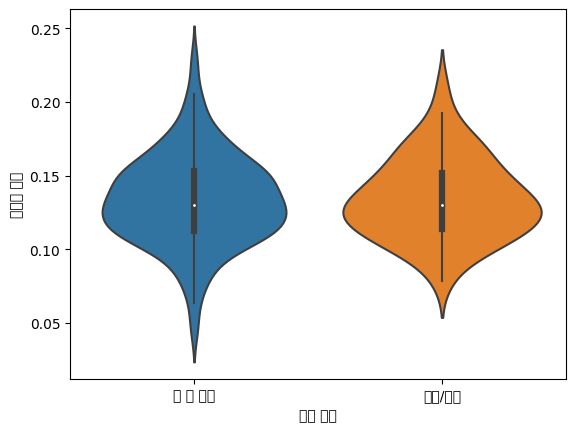

In [65]:
sns.violinplot(x='group', y='recipt_ratio', data=ct_pop)
plt.xticks([0,1], ['그 외 지역', '서울/경기'])
plt.xlabel('지역 구분')
plt.ylabel('수혜자 비율');

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  func(*args

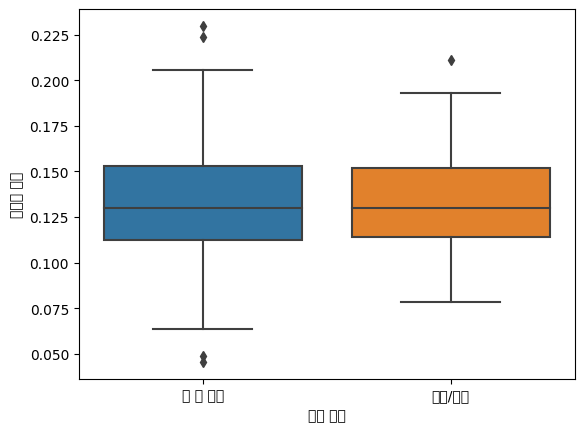

In [66]:
sns.boxplot(x='group', y='recipt_ratio', data=ct_pop)
plt.xticks([0,1], ['그 외 지역', '서울/경기'])
plt.xlabel('지역 구분')
plt.ylabel('수혜자 비율');

### 서울, 경기 지역과 그 외 지역 스포츠 바우처 사용 가능 종목 수 비교
- 가설: 서울, 경기 지역이 그 외 지역보다 스포츠 바우처 사용 가능 종목 수가 많을 것이다.
  - `group` column을 통해 서울,경기 와 그 외 지역을 구분하였으므로, 종목 개수(`kind_num`)에 차이가 있는지 확인 가능
  - Two-sample One-sided T-Test를 통해 통계적 유의성 확인

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

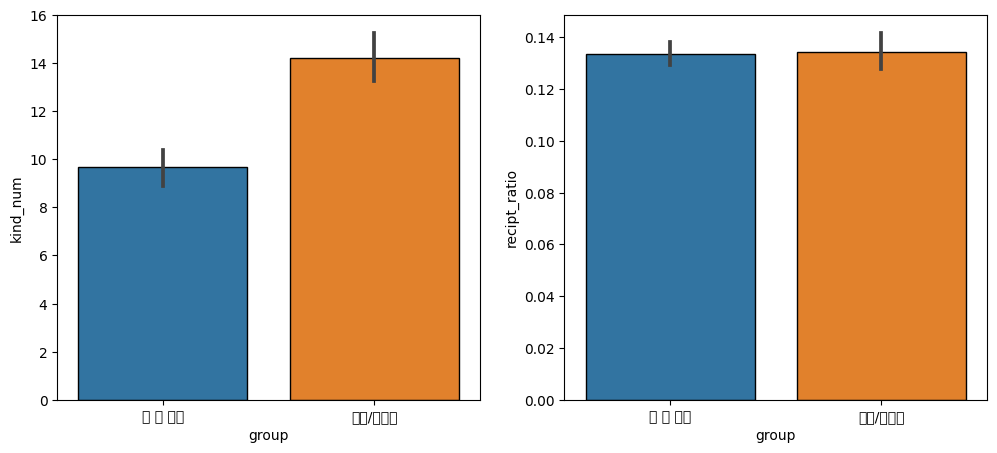

In [67]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.barplot(x='group', y = 'kind_num',data=ct_pop, ax = axes[0], palette ="tab10", edgecolor='black')
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(['그 외 지역', '서울/경기도'])

sns.barplot(x='group', y= 'recipt_ratio', data=ct_pop, ax = axes[1],palette ="tab10", edgecolor='black')
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(['그 외 지역', '서울/경기도'])
plt.show()

In [68]:
fac_m = ct_pop[ct_pop.group == 'main'].kind_num.to_list()
fac_r = ct_pop[ct_pop.group == 'rest'].kind_num.to_list()

# 정규성 검정 (shapiro)
# 서울,경기 / 그 외 지역 모두 p-value가 유의수준 0.05 보다 작지만, skewdness(왜도)<2, kurtosis(첨도)<7 값을 통해 정규성을 확보
# 참고 링크 https://velog.io/@changhtun1/%EC%A0%95%EA%B7%9C%EC%84%B1%EA%B2%80%EC%A0%95-%EA%BC%AD-%ED%95%84%EC%9A%94%ED%95%9C-%EA%B1%B8%EA%B9%8C
normal_fm = stats.shapiro(fac_m)
normal_fr = stats.shapiro(fac_r)

print(normal_fm, normal_fr,'\n')
print(f'main \n skewdness: {stats.skew(fac_m)} \n kurtosis: {stats.kurtosis(fac_m)}\n')
print(f'rest \n skewdness: {stats.skew(fac_r)} \n kurtosis: {stats.kurtosis(fac_r)}\n\n')

# 등분산성 검정 (levene)
# 등분산성 검정 결과 p-value가 유의수준 0.05보다 작기 때문에 등분산 가정 만족 X -> equal_var = False 로 두고 검정 진행
print(stats.levene(fac_m, fac_r), '\n')

# 독립표본 T-Test (Two samples one-sided T-Test)
 # null: main == rest
 # alternative: main > rest
stats.ttest_ind(fac_m, fac_r, equal_var=False, alternative='greater')
# p-value 0.05 보다 작으므로 귀무가설 기각

ShapiroResult(statistic=0.9510140419006348, pvalue=0.023612914606928825) ShapiroResult(statistic=0.9677514433860779, pvalue=0.000482529285363853) 

main 
 skewdness: -0.48358201313301824 
 kurtosis: -0.3166240747022302

rest 
 skewdness: 0.09303446653350984 
 kurtosis: -0.9885415949040484


LeveneResult(statistic=10.934283310220897, pvalue=0.0010973239214204776) 



TtestResult(statistic=7.126500905089983, pvalue=3.9432754228407786e-11, df=121.88500913924675)

- 가설검정 결과, 서울, 경기 지역이 그 외 지역보다 스포츠 바우처 사용 가능 종목 수가 많다고 볼 수 있음
- violinplot에서도 중앙값 및 전체적인 분포가 서울, 경기 지역이 더 위에 위치함 (= 평균적으로 종목 수가 더 많음)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  func(*args

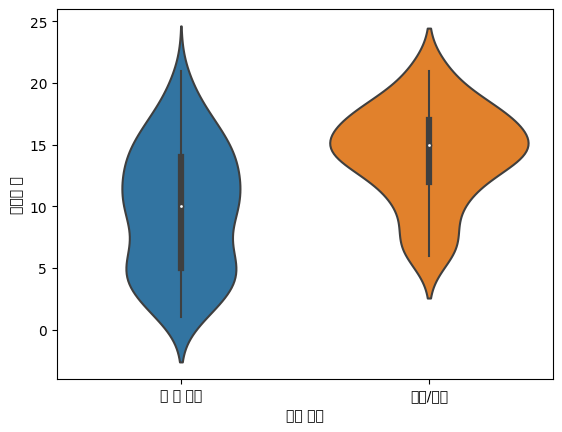

In [69]:
sns.violinplot(x='group', y='kind_num', data=ct_pop)
plt.xticks([0,1], ['그 외 지역', '서울/경기'])
plt.xlabel('지역 구분')
plt.ylabel('종목의 수');

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  func(*args

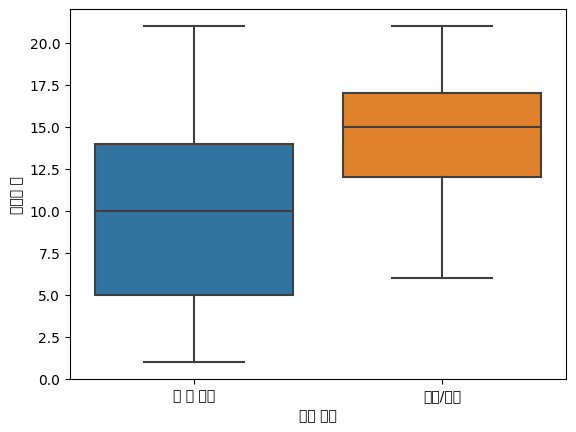

In [70]:
sns.boxplot(x='group', y='kind_num', data=ct_pop)
plt.xticks([0,1], ['그 외 지역', '서울/경기'])
plt.xlabel('지역 구분')
plt.ylabel('종목의 수');

### 서울, 경기 지역과 그 외 지역 평균 할당 수혜자 비율 (수혜자 수 / 참여 시설 수) 비교
- 가설: 서울, 경기 지역이 그 외 지역보다 시설 당 평균 수혜자 수가 적을 것이다. (수혜자 비율은 비슷하나, 스포츠 바우처 사용 가능 시설의 수가 많을 것)
  - `group` column을 통해 서울,경기 와 그 외 지역을 구분하였으므로, 수혜자 수(`density_ratio`)에 차이가 있는지 확인 가능
  - Two-sample One-sided T-Test를 통해 통계적 유의성 확인

In [71]:
# 시설 당 평균 수혜자 비율
ratio_m = ct_pop[ct_pop.group == 'main'].density_ratio.to_list()
ratio_r = ct_pop[ct_pop.group == 'rest'].density_ratio.to_list()

# 정규성 검정 (shapiro)
# 서울,경기 / 그 외 지역 모두 p-value가 유의수준 0.05 보다 작지만, skewdness(왜도)<2, kurtosis(첨도)<7 값을 통해 정규성을 확보
normal_fm = stats.shapiro(ratio_m)
normal_fr = stats.shapiro(ratio_r)

print(normal_fm, normal_fr,'\n')
print(f'main \n skewdness: {stats.skew(ratio_m)} \n kurtosis: {stats.kurtosis(ratio_m)}\n')
print(f'rest \n skewdness: {stats.skew(ratio_r)} \n kurtosis: {stats.kurtosis(ratio_r)}\n\n')

# 등분산성 검정 (levene)
# 등분산성 검정 결과 p-value가 유의수준 0.05보다 작기 때문에 등분산 가정 만족 X -> equal_var = False 로 두고 검정 진행
print(stats.levene(ratio_m, ratio_r), '\n')

# 독립표본 T-Test (Two samples one-sided T-Test)
 # null: main == rest
 # alternative: main < rest
stats.ttest_ind(ratio_m, ratio_r, equal_var=False, alternative='less')
# p-value 0.05 보다 작으므로 귀무가설 기각

ShapiroResult(statistic=0.9265336990356445, pvalue=0.002156098373234272) ShapiroResult(statistic=0.8430038690567017, pvalue=2.3335567419374703e-12) 

main 
 skewdness: 1.045722129151492 
 kurtosis: 3.6431194537858396

rest 
 skewdness: 1.969763415745578 
 kurtosis: 5.664337622281236


LeveneResult(statistic=13.14995981181451, pvalue=0.00035502443911825967) 



TtestResult(statistic=-6.505163208624685, pvalue=2.720603946461283e-10, df=213.1702333173463)

- 가설검정 결과, 서울, 경기 지역이 그 외 지역보다 시설 당 평균 수혜자 수가 적다고 볼 수 있음
- violinplot에서도 중앙값은 비슷하나, 그 외 지역의 경우 지역 간 편차가 비교적 심함

Text(0, 0.5, '시설 당 평균 수용 인원')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  func(*args

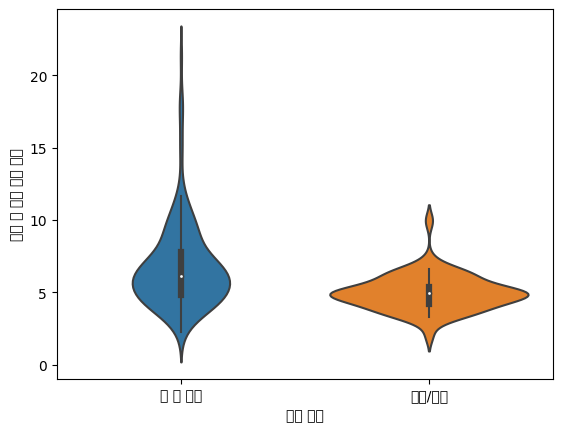

In [72]:
sns.violinplot(x='group', y='density_ratio', data=ct_pop)
plt.xticks([0,1], ['그 외 지역', '서울/경기'])
plt.xlabel('지역 구분')
plt.ylabel('시설 당 평균 수용 인원')

Text(0, 0.5, '시설 당 평균 수용 인원')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  func(*args

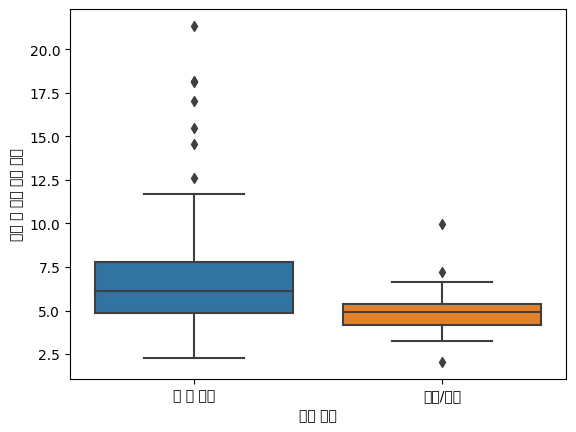

In [73]:
sns.boxplot(x='group', y='density_ratio', data=ct_pop)
plt.xticks([0,1], ['그 외 지역', '서울/경기'])
plt.xlabel('지역 구분')
plt.ylabel('시설 당 평균 수용 인원')

### 소결론
> 서울, 경기 외 지역은 서울, 경기와 비교했을 때 스포츠 바우처로 경험할 수 있는 종목이나 시설의 수가 적은 것을 알 수 있음</br>
&rarr; 지역의 취약계층 아이들의 스포츠 바우처 사용 경험 개선을 위한 정책이 필요함

### 서울/경기 외 지역 데이터 확인
  

In [74]:
# 서울/경기 외 지역 aggregation
rest = ct_pop[ct_pop['group']=='rest']
cfn = rest.pivot_table(values=['target','given', 'voucher_fac', 'kind_num','fac_total'], index='city', aggfunc='sum')
cfn['recipt_ratio'] = cfn['given']/cfn['target']
cfn['density_ratio'] = cfn['given']/cfn['voucher_fac']
cfn

,fac_total,given,kind_num,target,voucher_fac,recipt_ratio,density_ratio
city,,,,,,,
강원도,1114,2635,140,20122,534,0.130951,4.934457
경상남도,1770,6038,170,48189,1176,0.125298,5.134354
경상북도,1346,4324,166,34918,828,0.123833,5.222222
광주광역시,675,4661,77,27960,686,0.166702,6.794461
대구광역시,972,5420,107,33252,809,0.162998,6.699629
대전광역시,716,2511,70,20549,447,0.122196,5.617450
부산광역시,1601,6432,192,44190,1002,0.145553,6.419162
세종특별자치시,208,362,19,2842,125,0.127375,2.896000
울산광역시,451,1451,59,11522,343,0.125933,4.230321


In [75]:
# 비교를 위해 스탠다드스케일링 진행
# standard scaling = 평균 0, 표준편차 1로 수치 변환 -> 값이 3 이상 혹은 -3 이하가 되면 이상치로 볼 수 있음(3표준편차가 넘어갈 때 이상치로 간주)

from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
scl_cfn=scl.fit_transform(cfn)
scl_cfn=pd.DataFrame(index=cfn.index, columns=cfn.columns, data=scl_cfn)

In [76]:
scl_cfn

,fac_total,given,kind_num,target,voucher_fac,recipt_ratio,density_ratio
city,,,,,,,
강원도,0.411415,-0.593930,0.556559,-0.554593,-0.315396,-0.275453,-0.668256
경상남도,2.014077,1.345003,1.140363,1.647589,2.024558,-0.636401,-0.512130
경상북도,0.978210,0.368414,1.062522,0.606325,0.756172,-0.729965,-0.443502
광주광역시,-0.661098,0.560427,-0.669428,0.060389,0.238612,2.007332,0.784464
대구광역시,0.064497,0.992884,-0.085625,0.475608,0.686921,1.770779,0.710397
대전광역시,-0.560932,-0.664581,-0.805649,-0.521090,-0.632492,-0.834507,-0.134818
부산광역시,1.601196,1.569493,1.568485,1.333821,1.390365,0.656919,0.491344
세종특별자치시,-1.802017,-1.889020,-1.798115,-1.910409,-1.806114,-0.503794,-2.260352
울산광역시,-1.208348,-1.268539,-1.019710,-1.229363,-1.011550,-0.595875,-1.218207


- 서울/경기 외 지역 중에 특별히 수혜자 비율이나 시설 당 평균 수용 인원의 값이 이상치로 보이는 지역은 없음

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52280 (\N{HANGUL SYLLABLE CAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50977 (\N{HANGUL SYLLABLE YUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

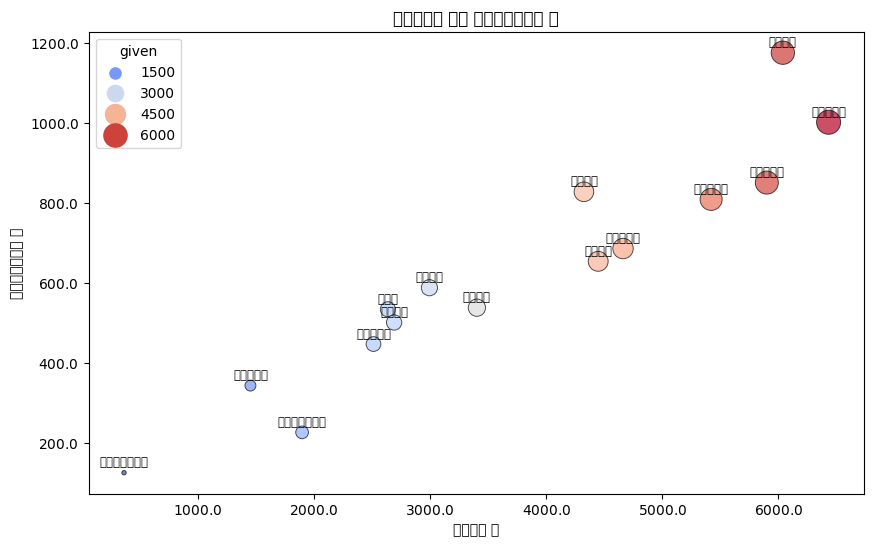

In [77]:
import matplotlib.ticker as ticker
plt.figure(figsize=(10,6))
sns.scatterplot(data = cfn, x='given', y='voucher_fac', size='given',sizes=(10, 300), hue='given', alpha=0.7, palette='coolwarm', edgecolor='black')
plt.xlabel('수혜자의 수')
plt.ylabel('참여체육시설의 수')
plt.title('수혜자수에 따른 참여체육시설의 수')

for i, txt in enumerate(cfn.index):
    plt.annotate(txt, (cfn['given'][i], cfn['voucher_fac'][i]), textcoords="offset points",
                 xytext=(0, 5), ha='center', fontsize='small')

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:}$'))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:}$'))
plt.show()

>전라북도와 경상북도는 수혜자 수가 비슷한데 참여체육시설의 수에서 차이가 나는 것으로 보임
</br>
&rarr; 전라북도가 시설 당 평균 수용 인원이 경상북도보다 더 높다는 것을 의미

In [78]:
cfn[cfn.index.isin(['경상북도', '전라북도'])]

,fac_total,given,kind_num,target,voucher_fac,recipt_ratio,density_ratio
city,,,,,,,
경상북도,1346,4324,166,34918,828,0.123833,5.222222
전라북도,897,4447,124,36028,654,0.123432,6.799694


경상북도와 전라북도의 수혜자의 비율은 거의 차이가 없지만 평균 수용인원은 약 2명 차이가 남


### Cast Study : 전라북도

#### 경상북도와 전라북도 비교

In [79]:
target_final = ct_pop[ct_pop.city.isin(['경상북도', '전라북도'])]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packa

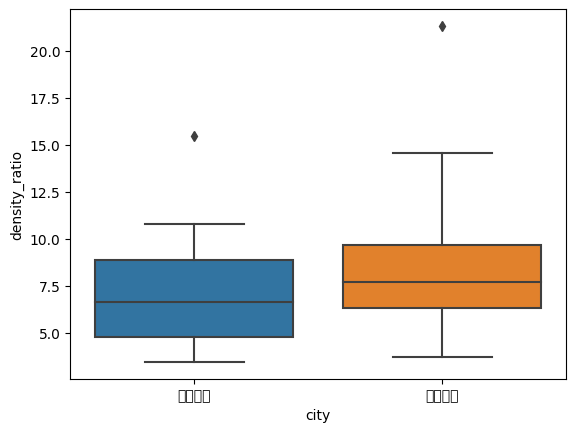

In [80]:
# 시설 당 평균 수용 인원
sns.boxplot(x='city', y = 'density_ratio',data=target_final, palette ='tab10')

plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52280 (\N{HANGUL SYLLABLE CAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

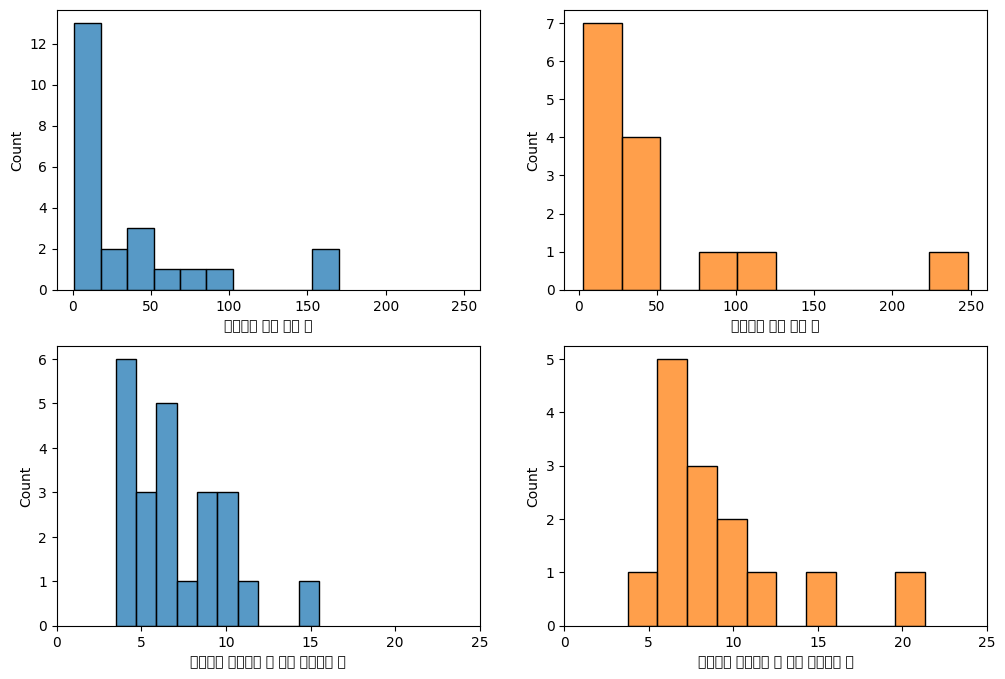

In [81]:

fig, axes = plt.subplots(2,2, figsize=(12,8))

sns.histplot(target_final.loc[target_final.city=='경상북도', 'voucher_fac'], bins=10, ax = axes[0,0], color='#1f77b4')
axes[0,0].set_xlabel('경상북도 참여 시설 수')
axes[0,0].set_xlim(-10,260)
sns.histplot(target_final.loc[target_final.city=='전라북도', 'voucher_fac'], bins=10, ax = axes[0,1], color='#ff7f0e')
axes[0,1].set_xlabel('전라북도 참여 시설 수')


sns.histplot(target_final.loc[target_final.city=='경상북도', 'density_ratio'], bins=10, ax = axes[1,0], color='#1f77b4')
axes[1,0].set_xlabel('경상북도 참여시설 수 대비 수혜자의 수')
axes[1,0].set_xlim([0,25])
sns.histplot(target_final.loc[target_final.city=='전라북도', 'density_ratio'], bins=10, ax = axes[1,1], color='#ff7f0e')
axes[1,1].set_xlabel('전라북도 참여시설 수 대비 수혜자의 수')
axes[1,1].set_xlim([0,25])

plt.show()

In [82]:
# 시설 당 평균 수용인원 구간 별 비율

con1 = target_final.density_ratio<=5
con2 = (target_final.density_ratio>5) & (target_final.density_ratio<=10)
con3 = target_final.density_ratio>10
region1 = target_final.city=='경상북도'
region2 = target_final.city=='전라북도'

# 경상북도 desity ratio 구간 비율
kb_under_5 = len(target_final[region1 & con1])/len(target_final[region1])
kb_under_10 = len(target_final[region1 & con2])/len(target_final[region1])
kb_above_10 = len(target_final[region1 & con3])/len(target_final[region1])
print(kb_under_5, kb_under_10, kb_above_10)

# 전라북도 desity ratio 구간 비율
jb_under_5 = len(target_final[region2 & con1])/len(target_final[region2])
jb_under_10 = len(target_final[region2 & con2])/len(target_final[region2])
jb_above_10 = len(target_final[region2 & con3])/len(target_final[region2])
print(jb_under_5, jb_under_10, jb_above_10)

jr = [kb_under_5, kb_under_10, kb_above_10]
ks = [jb_under_5, jb_under_10, jb_above_10]

density_range=pd.DataFrame({'구분':['5명 이하','5명 초과 10명 이하','10명 초과'],'경상북도':ks, '전라북도':jr})

density_range = density_range.melt(id_vars='구분')
density_range

0.30434782608695654 0.5217391304347826 0.17391304347826086
0.07142857142857142 0.7142857142857143 0.21428571428571427


,구분,variable,value
0,5명 이하,경상북도,0.071429
1,5명 초과 10명 이하,경상북도,0.714286
2,10명 초과,경상북도,0.214286
3,5명 이하,전라북도,0.304348
4,5명 초과 10명 이하,전라북도,0.521739
5,10명 초과,전라북도,0.173913


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(

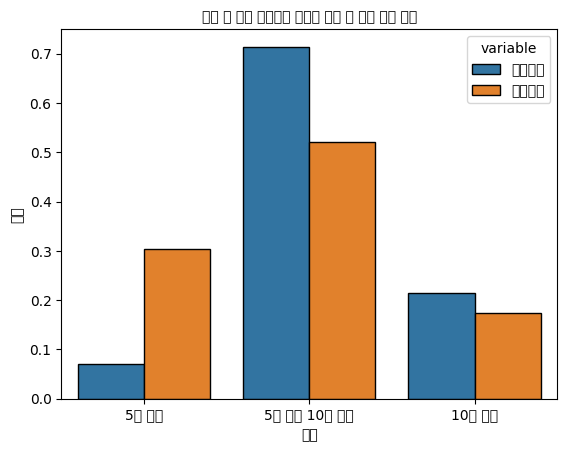

In [83]:
sns.barplot(data = density_range, x='구분', y='value', hue='variable', edgecolor='black')
plt.ylabel('비율')
plt.title('시설 당 평균 수용인원 구간에 따른 각 시군 수의 비율', size='medium');

#### 소결
> 경상북도에 비해 전라북도 지역은 스포츠 바우처로 경험할 수 있는 시설의 수가 적으며 도 내의 편차가 크다는 것을 알 수 있음</br>
&rarr; 지역의 취약계층 아이들의 스포츠 바우처의 접근성을 개선할 수 있는 방안이 필요함

### 전라북도 내 지역 현황 확인

In [84]:
jb=target_final[target_final['city']=='전라북도']
jb.sort_values(by='density_ratio', ascending=False)

# 장수군이 가장 높으며, 그 다음으로 고창군, 진안군, 남원시, 김제시 등의 순으로 평균 수용 인원이 높음

,group,city,district,target,given,recipt_ratio,fac_total,voucher_fac,join_ratio,kind_num,kind,density_ratio
197,rest,전라북도,장수군,335,64,0.191045,32,3,0.093750,1,[태권도],21.333333
187,rest,전라북도,고창군,942,102,0.108280,28,7,0.250000,4,"[복싱, 기타종목, 태권도, 합기도]",14.571429
200,rest,전라북도,진안군,372,67,0.180108,43,6,0.139535,3,"[태권도, 승마, 유도]",11.166667
190,rest,전라북도,남원시,1606,359,0.223537,46,37,0.804348,12,"[태권도, 기타종목, 검도, 필라테스, 수영, 탁구, 에어로빅, 헬스, 유도, 볼링...",9.702703
189,rest,전라북도,김제시,1834,308,0.167939,29,32,1.103448,11,"[댄스, 요가, 태권도, 발레, 기타종목, 합기도, 검도, 탁구, 볼링, 필라테스,...",9.625000
199,rest,전라북도,정읍시,2141,376,0.175619,43,46,1.069767,13,"[축구, 태권도, 검도, 기타종목, 유도, 요가, 헬스, 승마, 합기도, 수영, 발...",8.173913
196,rest,전라북도,임실군,450,65,0.144444,9,8,0.888889,4,"[댄스, 태권도, 기타종목, 수영]",8.125000
192,rest,전라북도,부안군,639,88,0.137715,21,12,0.571429,9,"[합기도, 기타종목, 태권도, 요가, 발레, 검도, 복싱, 유도, 테니스]",7.333333
194,rest,전라북도,완주군,2022,224,0.110781,64,32,0.500000,9,"[태권도, 검도, 헬스, 기타종목, 복싱, 합기도, 축구, 탁구, 필라테스]",7.000000
195,rest,전라북도,익산시,6722,760,0.113062,137,119,0.868613,15,"[테니스, 태권도, 기타종목, 복싱, 요가, 수영, 검도, 발레, 댄스, 합기도, ...",6.386555


In [85]:
# pip install geojson

In [86]:
# 지도로 확인
import json
import geojson
with open('skorea-municipalities-geo.json', 'r') as f:
    kr_geo = geojson.load(f)

filtered_features = [feature for feature in kr_geo['features'] if feature['properties']['NAME_1'] == 'Jeollabuk-do']

# 새로운 FeatureCollection 생성
filtered_geojson = geojson.FeatureCollection(filtered_features)
gun_nm=['부안군', '김제시', '고창군', '군산시', '익산시', '임실군',
        '장수군','정읍시', '전주시', '진안군', '무주군', '남원시','순창군','완주군']
i=0

for x in filtered_geojson['features'] :
        x['properties']['NAME_2']=gun_nm[i]
        i+=1

ModuleNotFoundError: ignored

In [ ]:
import plotly.express as px


fig = px.choropleth_mapbox(jb,
                           geojson=filtered_geojson,
                           locations=jb['district'],
                           color=jb['density_ratio'],
                           color_continuous_scale='Blues', featureidkey = 'properties.NAME_2',
                           mapbox_style='carto-positron',
                           zoom=8,
                           center = {"lat": 35.82194, "lon": 127.14889},
                           opacity=0.5,
                          )
fig

In [ ]:
final_s

In [ ]:
# 전라북도 내 체육 시설 확인

In [ ]:
p_f = final_s[final_s['code']=='P']
jpf = p_f[p_f['city']=='전라북도']
jpf_n = jpf.groupby('district')['name'].count().values

In [ ]:
jb['public_fac']=jpf_n

In [ ]:
# 스포츠 바우처로 이용 가능한 공공체육시설
# 스포츠 바우처 시설 데이터에는 공공, 민간 여부 컬럼이 없기 때문에 시설 이름에 특정 단어를 포함하고 있으면 공공시설로 간주함

jvf = final_v[final_v['city']=='전라북도']
for x in jvf['name'] :
    if '국민체육' in x or '생활체육' in x or '시설관리' in x:
        print(x)


In [ ]:
jb.loc[jb['district'].isin(['김제시', '임실군', '전주시']),'public_voucher']=[1,1,4]

In [ ]:
jb['public_voucher'].fillna(0, inplace=True)

In [ ]:
s2_fac = jpf[(jpf['type']=='생활체육관') | jpf['name'].str.contains('국민체육')]
s2_fac['district'].value_counts().reset_index()

In [ ]:
# 생활체육관 혹은 국민체육생활관의 개수 추가
s2_fac = jpf[(jpf['type']=='생활체육관') | jpf['name'].str.contains('국민체육')]
s2_fac['district'].value_counts().reset_index()

mapping = {}
for x in s2_fac['district'].value_counts().reset_index().iterrows() :
    i = x[1]
    mapping[i['index']]=i['district']

jb['km_fac'] = jb['district'].map(mapping)

In [ ]:
jb_fac = jb[['district','fac_total','public_fac','voucher_fac','public_voucher']]
jb_fac

In [ ]:
jb_fac.loc[201]=jb_fac.sum().values
jb_fac.loc[201, 'district']='전체합계'

In [ ]:
jb_fac

1. 장수군
- 전체 체육시설 데이터 상에서 장수군의 전체 체육시설의 수는 32개이며 그 중 30개가 공공시설임
- 그 중 스포츠바우처 사업에 참여하는 기관은 없음

2. 전라북도 전체
- 총 654개 참여기관 중 공공기관은 6개밖에 없음 (약 0.9%)

In [ ]:
jpf[jpf['district']=='장수군']['type'].value_counts()

장수군의 공공체육시설의 유형을 보면 생활체육관이 8개로 가장 많음.

#### 공공 체육시설 참여 시 시설 당 수용 인원 변화

In [ ]:
js_given = 64
current_fac = 3
public_fac = 30
type1_public_fac=8

# 만약 장수군의 모든 공공 체육 시설이 스포츠 바우처 사업에 참여한다면
current = js_given/current_fac
if1 = js_given/(current_fac+public_fac)
if2 = js_given/(current_fac+type1_public_fac)

print('현재 시설 당 수용 인원 : ',current )
print('모든 공공 체육 시실이 참여했을 때 : ', if1, "변화율 : ", (if1-current)/current)
print('생활체육관만 참여했을 때 : ', if2, "변화율 : ", (if2-current)/current)

- 장수군의 전체 공공 체육 시설이 스포츠 바우처 사업에 참여하면 약 90% 수용인원이 감소함
- 생활체육관만 참여한다고 했을 때에도 약 73% 수용인원이 감소함

In [ ]:
# 만약 전북의 모든 공공 체육 시설이 스포츠 바우처 사업에 참여한다면?

senario_1 = []
senario_2 = []

for x in jb.iterrows() :
    js_given = x[1]['given']
    current_fac = x[1]['voucher_fac']
    public_fac = x[1]['public_fac']
    public_voucher = x[1]['public_voucher']
    km_fac = x[1]['km_fac']

    if1 = js_given/(current_fac+public_fac-public_voucher)
    if2 = js_given/(current_fac+km_fac-public_voucher)

    senario_1.append(if1)
    senario_2.append(if2)


In [ ]:
jb_density_senario = jb[['district','density_ratio']]

In [ ]:
jb_density_senario['density_senario1']=senario_1

In [ ]:
jb_density_senario['change'] = (jb_density_senario['density_senario1']-jb_density_senario['density_ratio'])/jb_density_senario['density_ratio']

In [ ]:
jb_density_senario['density_senario2']=senario_2
jb_density_senario['change_2'] = (jb_density_senario['density_senario2']-jb_density_senario['density_ratio'])/jb_density_senario['density_ratio']

In [ ]:
jb_density_senario

In [ ]:
jb_density_senario.describe()

- 모든 공공 체육기관이 참여했을 때는 시설 당 평균 수용인원의 지역 평균이 약 50% 감소  
- 생활체육관과 국민체육센터만 참여했을 때는 시설 당 평균 수용인원의 지역 평균이 약 20% 감소

In [ ]:
jb[['district', 'given', 'voucher_fac','public_fac', 'public_voucher', 'km_fac']].sum().reset_index()

In [ ]:
# 전북 전체 밀집도
print(4447/654)

# senario_1 밀집도
print(4447/(654+358-6.0))

# senario_2 밀집도
print(4447/(654+50-6.0))

### 국민체육센터참여 현황

In [ ]:
len(final_s[final_s.name.str.contains('국민체육')])

In [ ]:
km_fac_voucher = final_v[final_v.name.str.contains('국민체육')]

In [ ]:
len(km_fac_voucher)

In [ ]:
len(km_fac_voucher)/len(final_s[final_s.name.str.contains('국민체육')])

전국에 331개의 국민체육센터 존재  
그 중 스포츠 바우처 사업에 참여하는 센터는 50개 (약 15%)